<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data_multi_delta_(0)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.932637,-0.710927,43.221710,43.997735,-0.776025
1,0.0,1.0,59.676255,0.709515,70.385770,69.851272,0.534498
2,0.0,2.0,50.825687,-0.680117,60.145570,60.962914,-0.817344
3,0.0,3.0,26.904696,-0.451262,36.453433,36.939787,-0.486354
4,0.0,4.0,70.789471,1.506905,82.296376,81.011938,1.284438
...,...,...,...,...,...,...,...
59995,999.0,55.0,27.468588,2.022701,39.491290,37.845416,1.645873
59996,999.0,56.0,90.760524,-0.434942,100.325582,100.754650,-0.429068
59997,999.0,57.0,55.396823,1.217099,66.613922,65.604780,1.009142
59998,999.0,58.0,50.322459,0.902021,61.224480,60.561099,0.663381


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.932637,-0.710927,43.221710,43.997735,-0.776025
1,0.0,1.0,59.676255,0.709515,70.385770,69.851272,0.534498
2,0.0,2.0,50.825687,-0.680117,60.145570,60.962914,-0.817344
3,0.0,3.0,26.904696,-0.451262,36.453433,36.939787,-0.486354
4,0.0,4.0,70.789471,1.506905,82.296376,81.011938,1.284438
...,...,...,...,...,...,...,...
59995,999.0,55.0,27.468588,2.022701,39.491290,37.845416,1.645873
59996,999.0,56.0,90.760524,-0.434942,100.325582,100.754650,-0.429068
59997,999.0,57.0,55.396823,1.217099,66.613922,65.604780,1.009142
59998,999.0,58.0,50.322459,0.902021,61.224480,60.561099,0.663381


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    33.932637 -0.710927   43.221710   43.997735 -0.776025
      1.0    59.676255  0.709515   70.385770   69.851272  0.534498
      2.0    50.825687 -0.680117   60.145570   60.962914 -0.817344
      3.0    26.904696 -0.451262   36.453433   36.939787 -0.486354
      4.0    70.789471  1.506905   82.296376   81.011938  1.284438
...                ...       ...         ...         ...       ...
999.0 55.0   27.468588  2.022701   39.491290   37.845416  1.645873
      56.0   90.760524 -0.434942  100.325582  100.754650 -0.429068
      57.0   55.396823  1.217099   66.613922   65.604780  1.009142
      58.0   50.322459  0.902021   61.224480   60.561099  0.663381
      59.0   58.227955  0.795534   69.023488   68.418793  0.604696

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    33.932637 -0.710927   43.221710   43.997735 -0.776025
      1.0    59.676255  0.709515   70.385770   69.851272  0.534498
      2.0    50.825687 -0.680117   60.145570   60.962914 -0.817344
      3.0    26.904696 -0.451262   36.453433   36.939787 -0.486354
      4.0    70.789471  1.506905   82.296376   81.011938  1.284438
...                ...       ...         ...         ...       ...
999.0 55.0   27.468588  2.022701   39.491290   37.845416  1.645873
      56.0   90.760524 -0.434942  100.325582  100.754650 -0.429068
      57.0   55.396823  1.217099   66.613922   65.604780  1.009142
      58.0   50.322459  0.902021   61.224480   60.561099  0.663381
      59.0   58.227955  0.795534   69.023488   68.418793  0.604696

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.932637,-0.710927,43.221710,43.997735,-0.776025
1,0.0,1.0,59.676255,0.709515,70.385770,69.851272,0.534498
2,0.0,2.0,50.825687,-0.680117,60.145570,60.962914,-0.817344
3,0.0,3.0,26.904696,-0.451262,36.453433,36.939787,-0.486354
4,0.0,4.0,70.789471,1.506905,82.296376,81.011938,1.284438
...,...,...,...,...,...,...,...
59995,999.0,55.0,27.468588,2.022701,39.491290,37.845416,1.645873
59996,999.0,56.0,90.760524,-0.434942,100.325582,100.754650,-0.429068
59997,999.0,57.0,55.396823,1.217099,66.613922,65.604780,1.009142
59998,999.0,58.0,50.322459,0.902021,61.224480,60.561099,0.663381


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    33.932637 -0.710927   43.221710   43.997735 -0.776025
      1.0    59.676255  0.709515   70.385770   69.851272  0.534498
      2.0    50.825687 -0.680117   60.145570   60.962914 -0.817344
      3.0    26.904696 -0.451262   36.453433   36.939787 -0.486354
      4.0    70.789471  1.506905   82.296376   81.011938  1.284438
...                ...       ...         ...         ...       ...
999.0 55.0   27.468588  2.022701   39.491290   37.845416  1.645873
      56.0   90.760524 -0.434942  100.325582  100.754650 -0.429068
      57.0   55.396823  1.217099   66.613922   65.604780  1.009142
      58.0   50.322459  0.902021   61.224480   60.561099  0.663381
      59.0   58.227955  0.795534   69.023488   68.418793  0.604696

[60000 rows x 5 columns]

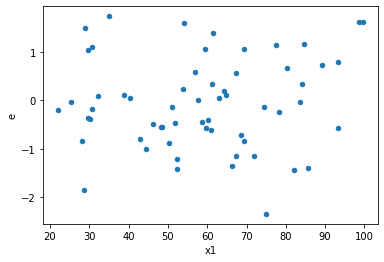

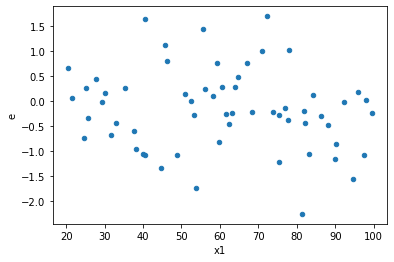

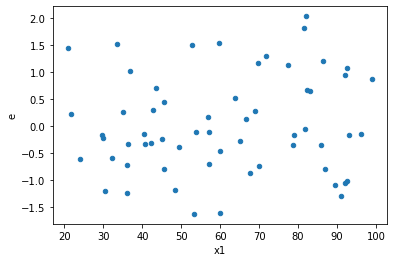

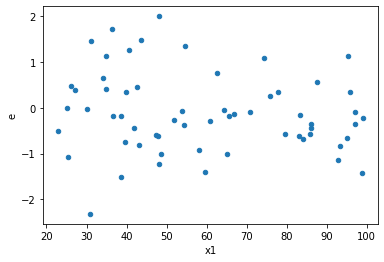

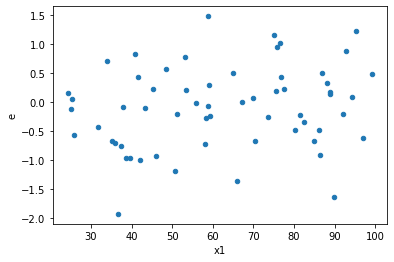

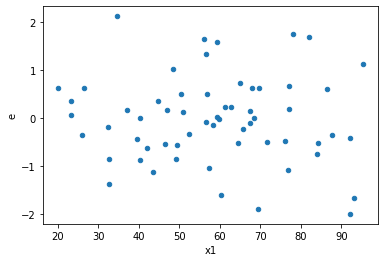

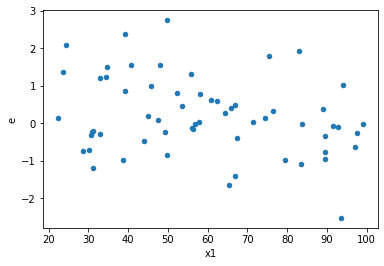

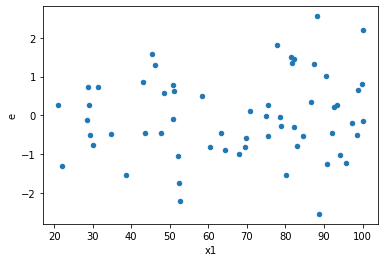

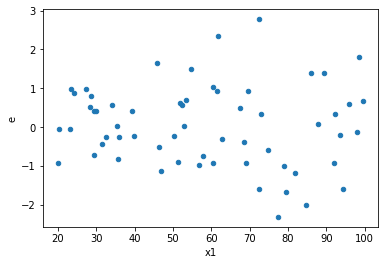

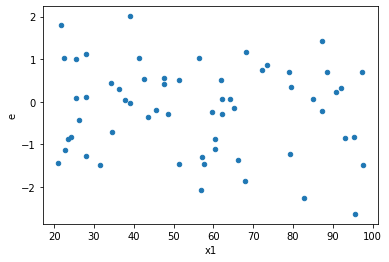

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x1')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,23.0,23.0,21.341194878403325,21.76190006848039,0.9278780381914489,0.9461695681947996,1.0197132912413824,0.9630674330700781,0.5184662834649609,0.48153371653503907,Reject005=1 : Homoscedasticity
4.0,23.0,23.0,21.815145104020875,34.57387831566039,0.948484569740038,1.5032121006808865,1.5848566741501013,0.27678229411705657,0.8616088529414717,0.13839114705852829,Reject005=1 : Homoscedasticity
6.0,23.0,23.0,14.762353329826682,27.88593919106223,0.6418414491228992,1.2124321387418362,1.8889900931120465,0.13455034618526396,0.932724826907368,0.06727517309263198,Reject005=1 : Homoscedasticity
7.0,23.0,23.0,13.58278862985471,27.234650179386684,0.5905560273849874,1.1841152251907254,2.0050853268470545,0.10222774020900194,0.948886129895499,0.05111387010450097,Reject005=1 : Homoscedasticity
8.0,23.0,23.0,19.379710645649055,31.025481414779822,0.8425961150282198,1.3489339745556443,1.6009259365152264,0.2664860945503238,0.8667569527248381,0.1332430472751619,Reject005=1 : Homoscedasticity
10.0,23.0,23.0,14.88934881951765,22.076185114127505,0.6473629921529414,0.959834135396848,1.4826830495897183,0.35171883014230554,0.8241405849288472,0.17585941507115277,Reject005=1 : Homoscedasticity
11.0,23.0,23.0,14.754096276024354,14.957109805192136,0.6414824467836676,0.6503091219648754,1.0137598078099626,0.9741405903349747,0.5129297048325127,0.48707029516748734,Reject005=1 : Homoscedasticity
12.0,23.0,23.0,15.25382693484401,20.554291856024,0.6632098667323483,0.8936648633053913,1.3474842702635,0.48010478455669126,0.7599476077216544,0.24005239227834563,Reject005=1 : Homoscedasticity
15.0,23.0,23.0,13.24704513040283,22.204250137399615,0.5759584839305578,0.9654021798869398,1.676166263406125,0.22302435364476492,0.8884878231776175,0.11151217682238246,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,27.608623136185997,27.523612113262494,1.2003749189646087,1.196678787533152,0.9969208524994467,0.9941635213852804,Reject005=1 : Homoscedasticity
1.0,23.0,23.0,26.69400105511296,15.022960061983138,1.1606087415266504,0.6531721766079626,0.5627841263273512,0.17559242888927684,Reject005=1 : Homoscedasticity
2.0,23.0,23.0,26.750849372365646,26.063979041693592,1.1630804074941585,1.1332164800736344,0.9743234197497441,0.9508020835761506,Reject005=1 : Homoscedasticity
3.0,23.0,23.0,21.341194878403325,21.76190006848039,0.9278780381914489,0.9461695681947996,1.0197132912413824,0.9630674330700781,Reject005=1 : Homoscedasticity
4.0,23.0,23.0,21.815145104020875,34.57387831566039,0.948484569740038,1.5032121006808865,1.5848566741501013,0.27678229411705657,Reject005=1 : Homoscedasticity
5.0,23.0,23.0,43.09455650156121,19.692699553836412,1.873676369633096,0.8562043284276701,0.456964896555392,0.06651566330702882,Reject005=1 : Homoscedasticity
6.0,23.0,23.0,14.762353329826682,27.88593919106223,0.6418414491228992,1.2124321387418362,1.8889900931120465,0.13455034618526396,Reject005=1 : Homoscedasticity
7.0,23.0,23.0,13.58278862985471,27.234650179386684,0.5905560273849874,1.1841152251907254,2.0050853268470545,0.10222774020900194,Reject005=1 : Homoscedasticity
8.0,23.0,23.0,19.379710645649055,31.025481414779822,0.8425961150282198,1.3489339745556443,1.6009259365152264,0.2664860945503238,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      954
Reject005=0 : Heteroscedasticity     46
Name: Result_test, dtype: int64